---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    df = pd.read_csv('assets/fraud_data.csv')
    fraud_percentage = df['Class'].mean()
    return fraud_percentage
    
print(answer_one())

0.016410823768035772


In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    """
    Trains a dummy classifier that predicts the majority class for all samples in the test set.
    Computes the accuracy and recall scores of the classifier.

    Returns:
    - accuracy (float): Accuracy score of the dummy classifier on the test data.
    - recall (float): Recall score (sensitivity) of the dummy classifier on the test data.
    """
    # Initialize a DummyClassifier that predicts the most frequent class (majority class)
    clf = DummyClassifier(strategy='most_frequent')
    
    # Train (fit) the classifier using the training data
    clf.fit(X_train, y_train)
    
    # Calculate accuracy score on the test set
    accuracy = clf.score(X_test, y_test)
    
    # Calculate recall score on the test set
    recall = recall_score(y_test, clf.predict(X_test))
    
    return accuracy, recall

print(answer_two())

(0.9852507374631269, 0.0)


### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    """
    Evaluates an SVC classifier on the provided test set and computes accuracy, recall, and precision scores.

    Returns:
    - accuracy (float): Accuracy score of the classifier on the test data.
    - recall (float): Recall score (sensitivity) of the classifier on the test data.
    - precision (float): Precision score of the classifier on the test data.
    """
    
    # Initialize an SVC classifier with default parameters
    clf = SVC()
    
    # Train (fit) the classifier using the training data
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy score on the test set
    accuracy = clf.score(X_test, y_test)
    
    # Calculate recall score on the test set
    recall = recall_score(y_test, y_pred)
    
    # Calculate precision score on the test set
    precision = precision_score(y_test, y_pred)
    
    return accuracy, recall, precision

print(answer_three())

(0.9900442477876106, 0.35, 0.9333333333333333)


### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    """
    Trains an SVC classifier with specific parameters and computes the confusion matrix
    using a decision threshold of -220 on the decision function.

    Returns:
    - cm (numpy.ndarray): Confusion matrix of shape (2, 2).
    """

    # Initialize an SVC classifier with parameters C=1e9 and gamma=1e-07
    clf = SVC(C=1e9, gamma=1e-07)
    
    # Train (fit) the classifier using the training data
    clf.fit(X_train, y_train)
    
    # Obtain decision values (scores) from the decision function on the test set
    decision_values = clf.decision_function(X_test)
    
    # Threshold decision values to predict labels (fraud or not fraud)
    y_pred = (decision_values > -220).astype(int)
    
    # Compute the confusion matrix based on the predicted labels and actual labels
    cm = confusion_matrix(y_test, y_pred)
    
    return cm

print(answer_four())

[[5320   24]
 [  14   66]]


### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train. This classifier should use the parameter solver='liblinear'.

For the logisitic regression classifier, compute the scores using decision_function() or with predict_proba(), then create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

Note: When getting the ROC curve and finding the records where the FPR entry is closest to 0.16, take the corresponding TPRs. As there are two such records where the FPR is close to 0.16, take the higher TPR of these two records.

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

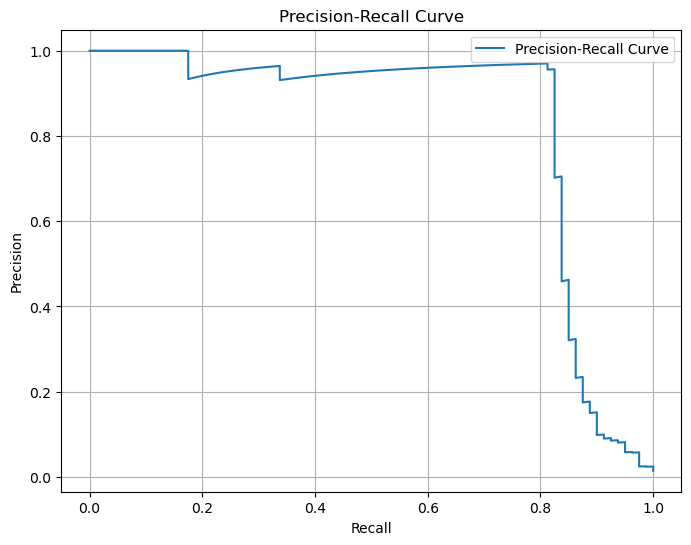

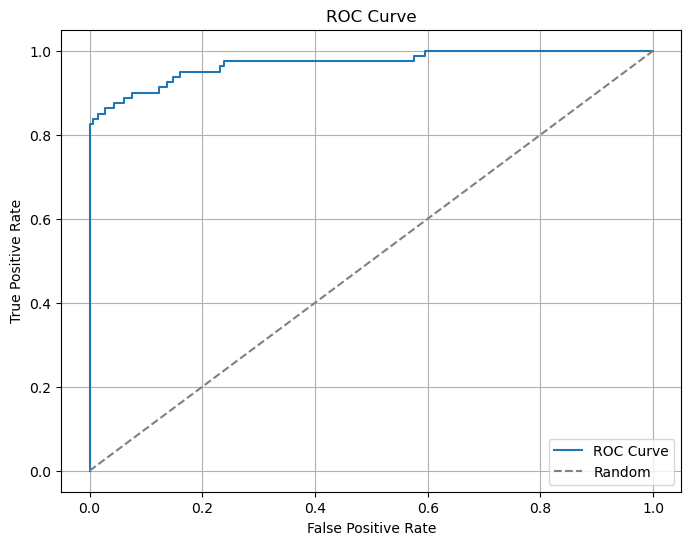

(0.825, 0.9375)


In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve

def answer_five():
    """
    Trains a logistic regression classifier with default parameters using X_train and y_train.
    Plots the Precision-Recall Curve and ROC Curve using y_test and the probability estimates for X_test.
    Finds and returns the recall when precision is 0.75 and the true positive rate when false positive rate is 0.16.

    Returns:
    - recall_at_precision_75 (float): Recall score when precision is 0.75.
    - tpr_at_fpr_016 (float): True positive rate (sensitivity) when false positive rate is approximately 0.16.
    """

    # Initialize a logistic regression classifier with solver='liblinear'
    clf = LogisticRegression(solver='liblinear')
    
    # Train (fit) the classifier using the training data
    clf.fit(X_train, y_train)

    # Predict probabilities for the test set
    probabilities = clf.predict_proba(X_test)

    # Compute precision-recall pairs for different probability thresholds
    precision, recall, _ = precision_recall_curve(y_test, probabilities[:, 1])

    # Compute ROC curve and ROC area for the test set
    fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])

    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    # Find recall when precision is 0.75
    # np.argmax(precision >= 0.75) finds the index where precision first meets or exceeds 0.75
    recall_at_precision_75 = recall[np.argmax(precision >= 0.75)]
    
    # Find true positive rate when false positive rate is approximately 0.16
    # np.argmin(np.abs(fpr - 0.16)) finds the index where the absolute difference between FPR and 0.16 is minimized,
    # effectively finding the closest FPR to 0.16
    tpr_at_fpr_016 = tpr[np.argmin(np.abs(fpr - 0.16))]
    
    
    return recall_at_precision_75, tpr_at_fpr_016

print(answer_five())

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    """
    Performs grid search over specified parameters for a Logistic Regression classifier.
    Uses recall for scoring and 3-fold cross-validation.

    Returns:
    - mean_test_scores (numpy array): A 4x2 numpy array containing the mean test scores of each parameter combination.
    """
    
    # Define the parameter grid
    param_grid = {'penalty': ['l1', 'l2'],
                  'C': [0.01, 0.1, 1, 10]}
    
    # Create a Logistic Regression classifier
    clf = LogisticRegression(solver='liblinear')
    
    # Perform grid search with recall scoring and 3-fold cross-validation
    grid_search = GridSearchCV(clf, param_grid, scoring='recall', cv=3)
    grid_search.fit(X_train, y_train)
    
    # Extract mean test scores from cv_results_
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    
    # Reshape mean test scores into a 4x2 numpy array
    mean_test_scores = mean_test_scores.reshape(4, 2)
    
    return mean_test_scores

results = answer_six()
print(results)

[[0.66666667 0.76086957]
 [0.80072464 0.80434783]
 [0.8115942  0.8115942 ]
 [0.80797101 0.8115942 ]]


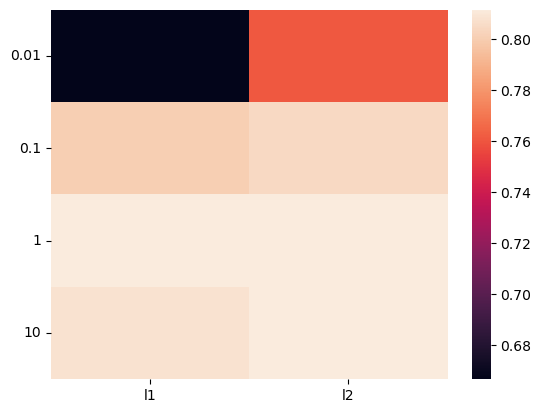

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0)

GridSearch_Heatmap(answer_six())
